In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import pickle
import warnings
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
import pmdarima as pm
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARMA
import itertools
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from sklearn.metrics import mean_squared_error
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import panel as pn

In [2]:
df=pd.read_csv('gdp data.csv',index_col='Years',parse_dates=['Years'])
df

,GDP (current USD in billions),Inflation Rate CPI (compared to previous year),Annual Change in inflation rate,Unemployment Rate (% of labor force) (modeled IMO estimate),Foreign Direct Investment Inflow (in billions of USD),General Government final consumption expenditure (% of GDP)
Years,,,,,,
1960-01-01,37.03,1.78,NaN,NaN,NaN,6.6
1961-01-01,39.23,1.70,0.08,NaN,NaN,6.9
1962-01-01,42.16,3.63,-1.93,NaN,NaN,7.8
1963-01-01,48.42,2.95,0.68,NaN,NaN,8.7
1964-01-01,56.48,13.36,-10.41,NaN,NaN,8.0
...,...,...,...,...,...,...
2019-01-01,2840.00,3.73,0.21,6.51,50.61,11.0
2020-01-01,2670.00,6.62,-2.89,7.90,64.36,11.6
2021-01-01,3150.00,5.13,1.49,6.40,44.73,11.2


In [3]:
df2=df.fillna({'Inflation Rate CPI (compared to previous year)': 5.69})
df3=df2.fillna({'General Government final consumption expenditure (% of GDP)': 9.3})
df3

,GDP (current USD in billions),Inflation Rate CPI (compared to previous year),Annual Change in inflation rate,Unemployment Rate (% of labor force) (modeled IMO estimate),Foreign Direct Investment Inflow (in billions of USD),General Government final consumption expenditure (% of GDP)
Years,,,,,,
1960-01-01,37.03,1.78,NaN,NaN,NaN,6.6
1961-01-01,39.23,1.70,0.08,NaN,NaN,6.9
1962-01-01,42.16,3.63,-1.93,NaN,NaN,7.8
1963-01-01,48.42,2.95,0.68,NaN,NaN,8.7
1964-01-01,56.48,13.36,-10.41,NaN,NaN,8.0
...,...,...,...,...,...,...
2019-01-01,2840.00,3.73,0.21,6.51,50.61,11.0
2020-01-01,2670.00,6.62,-2.89,7.90,64.36,11.6
2021-01-01,3150.00,5.13,1.49,6.40,44.73,11.2


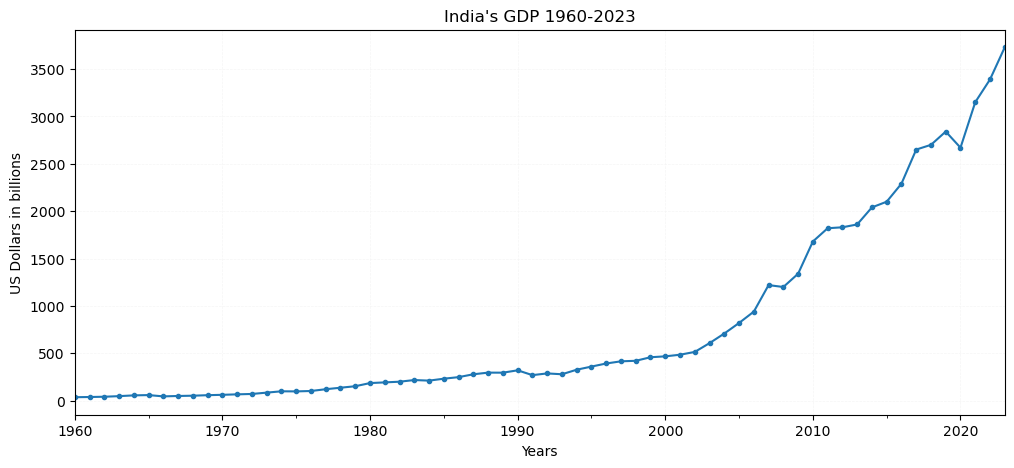

In [4]:
#df.set_index("Years", inplace=True)
df["GDP (current USD in billions)"].plot(figsize=(12,5),marker='.')
plt.title("India's GDP 1960-2023")
plt.ylabel("US Dollars in billions")
plt.grid(color = 'whitesmoke', linestyle = '--', linewidth = 0.5)
plt.savefig('IndiaGDP.png',transparent=True)

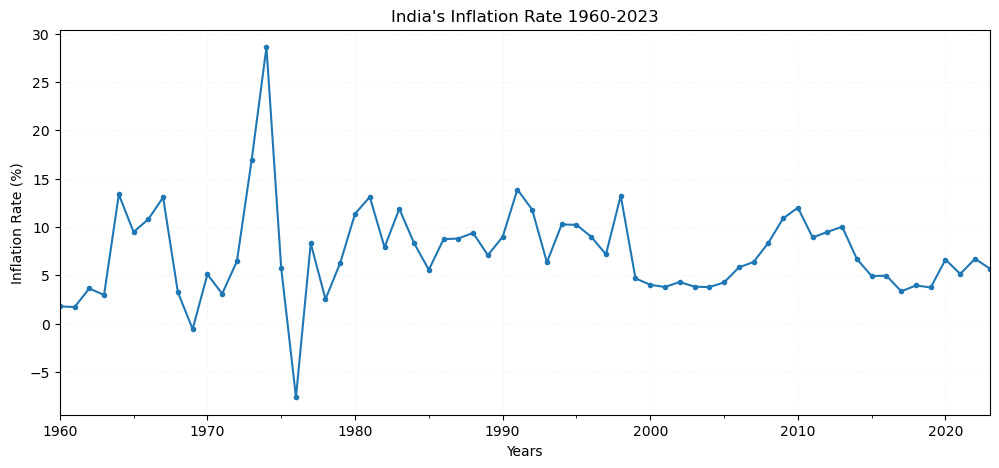

In [5]:
df3["Inflation Rate CPI (compared to previous year)"].plot(figsize=(12,5),marker='.')
plt.title("India's Inflation Rate 1960-2023")
plt.ylabel("Inflation Rate (%)")
plt.grid(color = 'whitesmoke', linestyle = '--', linewidth = 0.5)
plt.savefig('IndiaInflation.png',transparent=True)

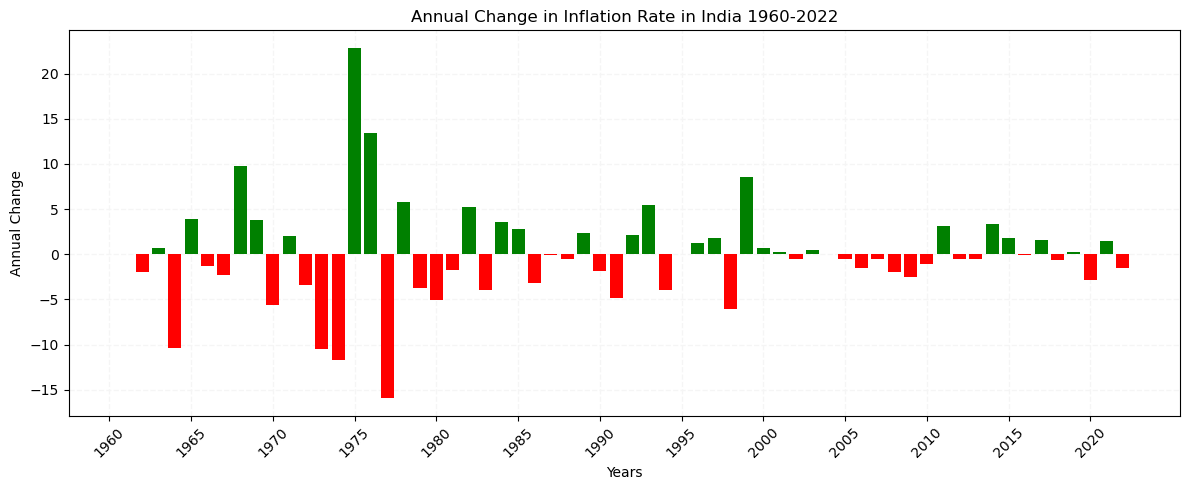

<Figure size 640x480 with 0 Axes>

In [6]:
df = pd.read_csv('gdp data.csv')
X = df['Years'] 
Y = df['Annual Change in inflation rate'] 
plt.figure(figsize=(12, 5))
plt.bar(X, Y, color=['red' if y < 0 else 'green' for y in Y], zorder=3)
plt.title("Annual Change in Inflation Rate in India 1960-2022")
plt.ylabel("Annual Change")
plt.xlabel("Years")
plt.xticks(range(min(X), max(X)+1, 5), rotation=45)
plt.grid(color = 'whitesmoke', linestyle = '--', linewidth = 1, zorder=0)
plt.tight_layout()
plt.show()
plt.savefig('InflationChange.png',transparent=True)

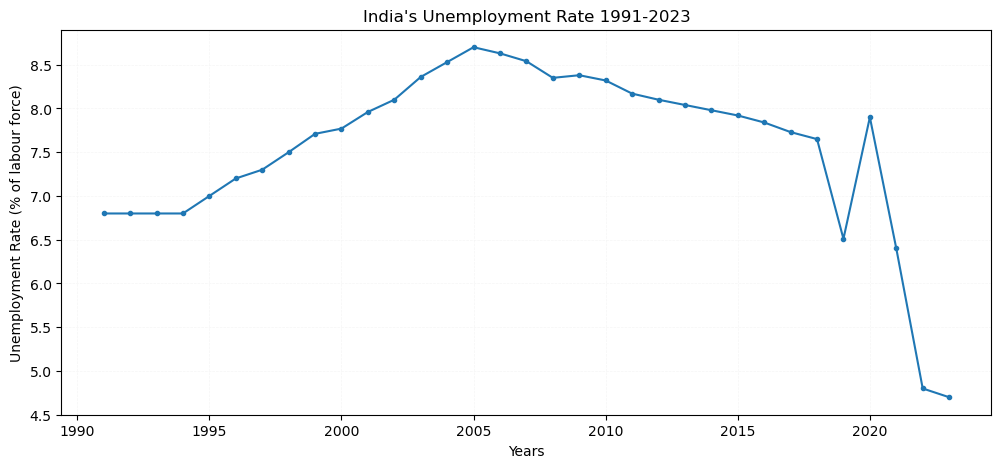

In [7]:
df['Years'] = df['Years'].astype(str)
df.set_index('Years', inplace=True)
df["Unemployment Rate (% of labor force) (modeled IMO estimate)"].plot(figsize=(12,5),marker='.')
plt.title("India's Unemployment Rate 1991-2023")
plt.ylabel("Unemployment Rate (% of labour force)")
plt.grid(color = 'whitesmoke', linestyle = '--', linewidth = 0.5)
plt.savefig('IndiaUnemp.png',transparent=True)

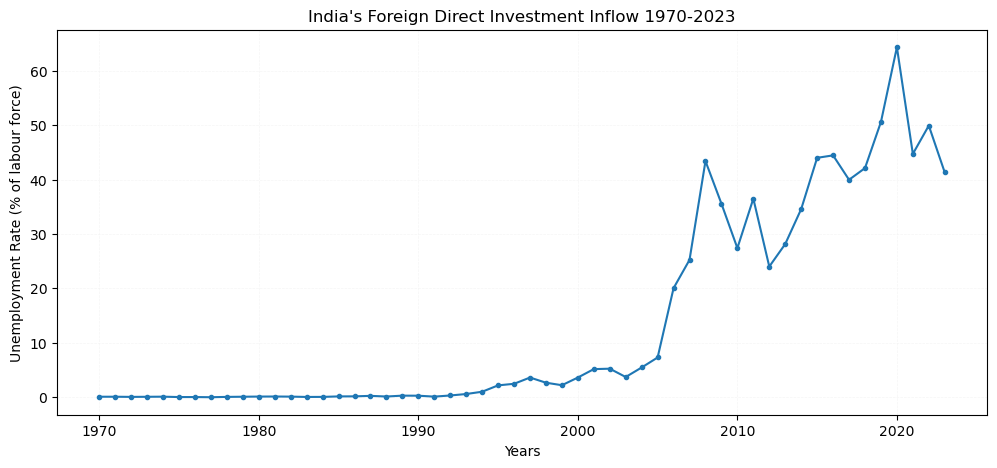

In [8]:
df["Foreign Direct Investment Inflow (in billions of USD)"].plot(figsize=(12,5),marker='.')
plt.title("India's Foreign Direct Investment Inflow 1970-2023")
plt.ylabel("Unemployment Rate (% of labour force)")
plt.grid(color = 'whitesmoke', linestyle = '--', linewidth = 0.5)
plt.savefig('IndiaUnemp.png',transparent=True)

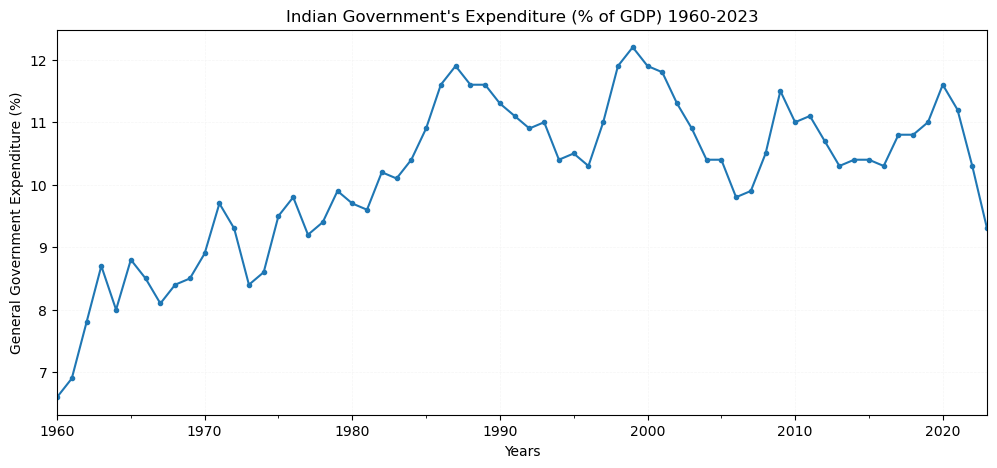

In [9]:
df3["General Government final consumption expenditure (% of GDP)"].plot(figsize=(12,5),marker='.')
plt.title("Indian Government's Expenditure (% of GDP) 1960-2023")
plt.ylabel("General Government Expenditure (%)")
plt.grid(color = 'whitesmoke', linestyle = '--', linewidth = 0.5)
plt.savefig('IndiaGovtp.png',transparent=True)

In [4]:
#augmented dickey-fuller test
def ad_test(dataset):
    dftest = adfuller(dataset,autolag = 'AIC')
    print("1. ADF : ", dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used for ADF Regression and Critical Values Calculation : ", dftest[3])
    print("5. Critical Values : ")
    for key, val in dftest[4].items():
        print("\t",key,":",val)

In [17]:
ad_test(df['GDP (current USD in billions)'])

1. ADF :  2.824556736760176
2. P-Value :  1.0
3. Num Of Lags :  10
4. Num Of Observations Used for ADF Regression and Critical Values Calculation :  53
5. Critical Values : 
	 1% : -3.560242358792829
	 5% : -2.9178502070837
	 10% : -2.5967964150943397


In [6]:
GDP=df['GDP (current USD in billions)']
GDP_diff = GDP.diff().dropna()
result = adfuller(GDP_diff)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: 0.9626871268314107
p-value: 0.993856228688472


In [7]:
GDP=df['GDP (current USD in billions)']
GDP_log = np.log(GDP).dropna()
result = adfuller(GDP_log)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: 0.2341891479902387
p-value: 0.974115270738132


1. ADF :  -7.577563762049556
2. P-Value :  2.735882076141862e-11
3. Num Of Lags :  0
4. Num Of Observations Used for ADF Regression and Critical Values Calculation :  62
5. Critical Values : 
	 1% : -3.540522678829176
	 5% : -2.9094272025108254
	 10% : -2.5923136524453696


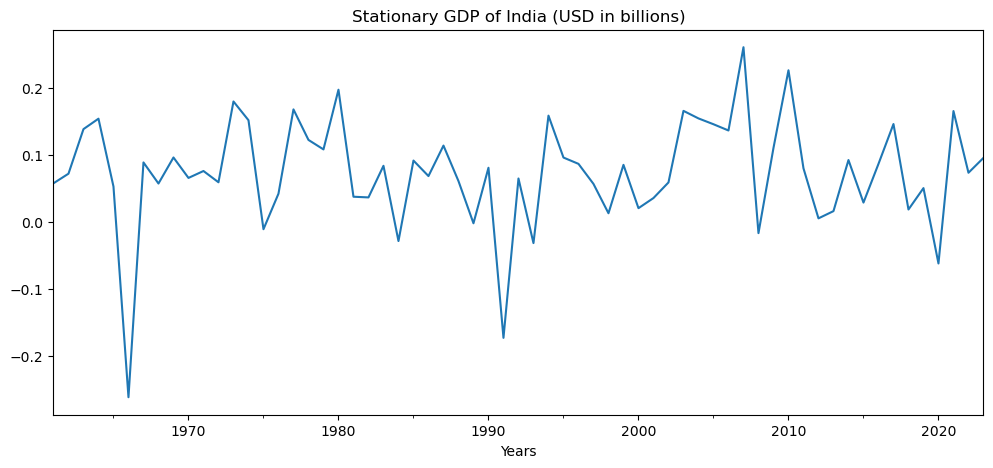

In [57]:
GDP=df['GDP (current USD in billions)']
GDP_log = np.log(GDP)
GDP_log_diff = GDP_log.diff().dropna()
ad_test(GDP_log_diff)
GDP_log_diff.plot(figsize=(12,5))
plt.title('Stationary GDP of India (USD in billions)')
plt.savefig('GDP_Stat.png',transparent=True)

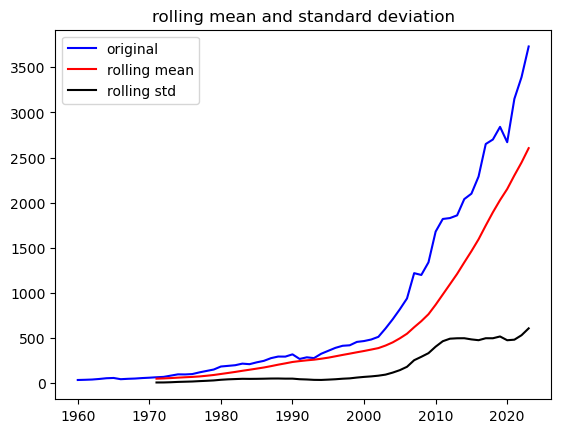

In [14]:
rollmean = df['GDP (current USD in billions)'].rolling(window=12).mean()
rollstd = df['GDP (current USD in billions)'].rolling(window=12).std()
orig = plt.plot(df['GDP (current USD in billions)'], color ='blue', label='original')
mean = plt.plot(rollmean, color='red', label='rolling mean')
std =plt.plot(rollstd, color='black', label="rolling std")
plt.legend(loc='best')
plt.title("rolling mean and standard deviation")
plt.savefig('orig_rolling.png')

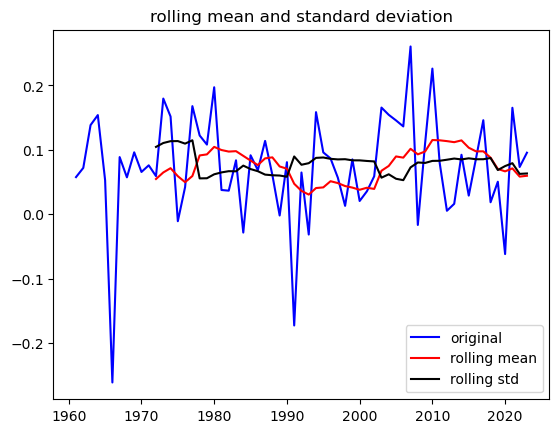

In [13]:
rollmean = GDP_log_diff.rolling(window=12).mean()
rollstd = GDP_log_diff.rolling(window=12).std()
orig = plt.plot(GDP_log_diff, color ='blue', label='original')
mean = plt.plot(rollmean, color='red', label='rolling mean')
std =plt.plot(rollstd, color='black', label="rolling std")
plt.legend(loc='best')
plt.title("rolling mean and standard deviation")
plt.savefig('gdp_stat_rolling.png')

In [30]:
stepwise_fit = auto_arima(df['GDP (current USD in billions)'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=748.670, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=780.921, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=758.698, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=744.922, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=745.602, Time=0.05 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=745.469, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=746.671, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=743.041, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=782.811, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=743.860, Time=0.07 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=743.761, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=760.374, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=744.883, Time=0.12 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0] intercept
Total fit time: 0.721 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   64
Model:               SARIMAX(0, 2, 1)   Log Likelihood                -368.520
Date:                Sun, 07 Apr 2024   AIC                            743.041
Time:                        05:00:28   BIC                            749.422
Sample:                    01-01-1960   HQIC                           745.546
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.5057      1.232      2.847      0.004       1.092       5.919
ma.L1         -0.9034      0.092     -9.817      0.000      -1.084      -0.723
sigma2      8290.9400   1064.132      7.791      0.000    6205.279    1.04e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.20   Jarque-Bera (JB):                84.45
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):              75.75   Skew:                             0.90
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
print(df.shape)
train=df.iloc[:-10]
test=df.iloc[-10:]
print(train.shape,test.shape)

(64, 6)
(54, 6) (10, 6)


In [32]:
model=ARIMA(train['GDP (current USD in billions)'],order=(0,2,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:     GDP (current USD in billions)   No. Observations:                   54
Model:                            ARIMA(0, 2, 1)   Log Likelihood                -285.575
Date:                           Sun, 07 Apr 2024   AIC                            575.149
Time:                                   05:00:30   BIC                            579.052
Sample:                               01-01-1960   HQIC                           576.645
                                    - 01-01-2013                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7582      0.046    -16.358      0.000      -0.849      -0.667
sigma2      3392.9449    328.168     10.339      0.000    2749.747    4036.143
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                96.68
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):             185.91   Skew:                             1.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
from pandas.tseries.frequencies import to_offset

start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end)
pred.columns=['gdp_predicted']
pred

2014-01-01    1958.778880
2015-01-01    2057.557761
2016-01-01    2156.336641
2017-01-01    2255.115521
2018-01-01    2353.894402
2019-01-01    2452.673282
2020-01-01    2551.452162
2021-01-01    2650.231043
2022-01-01    2749.009923
2023-01-01    2847.788803
Freq: AS-JAN, Name: predicted_mean, dtype: float64

<Axes: xlabel='Years'>

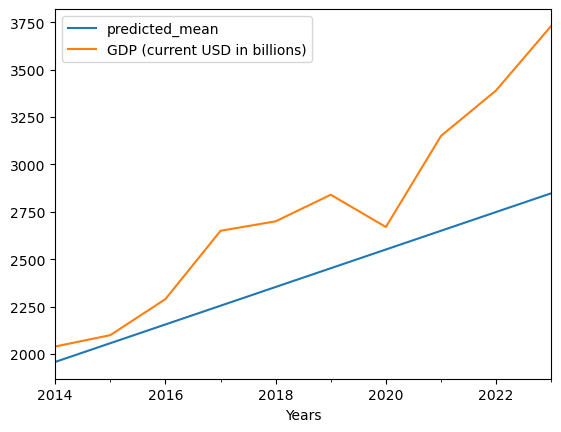

In [34]:
pred.plot(legend=True)
test['GDP (current USD in billions)'].plot(legend=True)

In [35]:
lag_acf = acf(GDP_log_diff, nlags=20)
lag_pacf = pacf(GDP_log_diff, nlags=20)

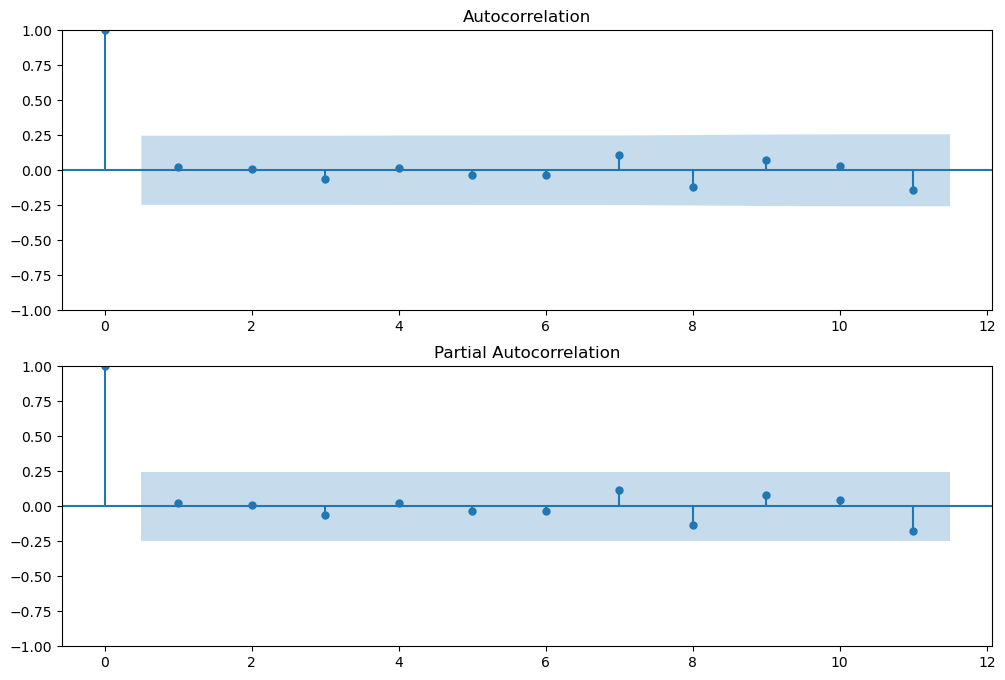

In [19]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
GDP_log_diff = GDP_log.diff().dropna()
fig = sm.graphics.tsa.plot_acf(GDP_log_diff.dropna(),lags=11,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(GDP_log_diff.dropna(),lags=11,ax=ax2)

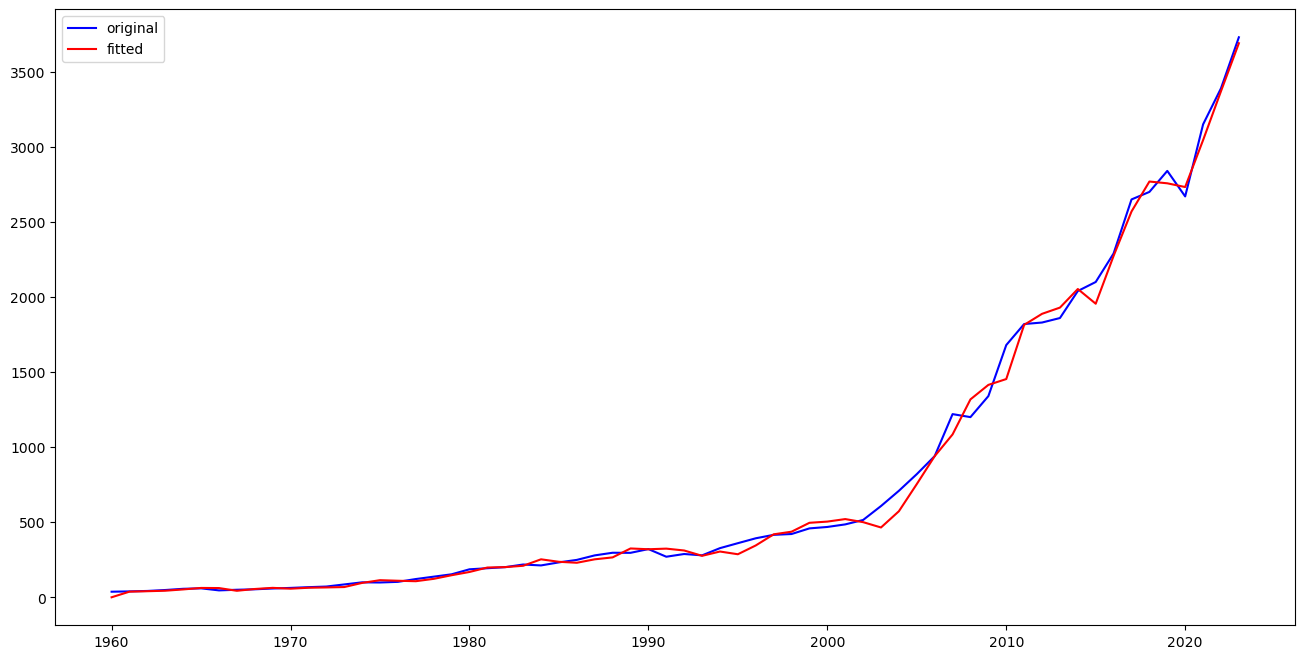

In [38]:
plt.figure(figsize=(16,8))
model = ARIMA(df['GDP (current USD in billions)'], order=(9,1,11))
results_ARIMA = model.fit()
plt.plot(df['GDP (current USD in billions)'], color='blue', label='original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='fitted')
plt.legend()
plt.savefig("arima_whole.png")

In [62]:
results_ARIMA.predict(58,73)

2018-01-01    2769.150722
2019-01-01    2757.385235
2020-01-01    2732.523873
2021-01-01    3045.213988
2022-01-01    3370.680648
2023-01-01    3690.233455
2024-01-01    3748.942533
2025-01-01    3848.406736
2026-01-01    3953.993418
2027-01-01    4094.399330
2028-01-01    4482.369860
2029-01-01    4738.125735
2030-01-01    4880.363283
2031-01-01    4760.504091
2032-01-01    4817.509555
2033-01-01    5096.703172
Freq: AS-JAN, Name: predicted_mean, dtype: float64

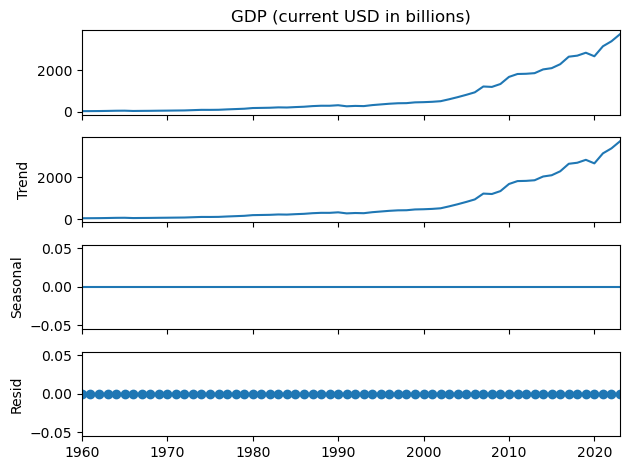

In [15]:
decomposition = sm.tsa.seasonal_decompose(df['GDP (current USD in billions)'], model='additive')
fig=decomposition.plot()
plt.savefig('trend_orig.png', transparent=True)

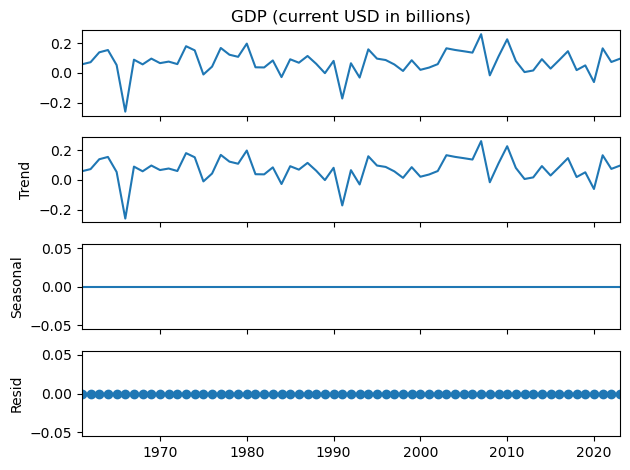

In [24]:
decomposition = sm.tsa.seasonal_decompose(GDP_log_diff, model='additive')
fig=decomposition.plot()
plt.savefig('trend_diff.png', transparent=True)

In [21]:
adftest=adfuller(df['GDP (current USD in billions)'])
print(adftest[1])

1.0


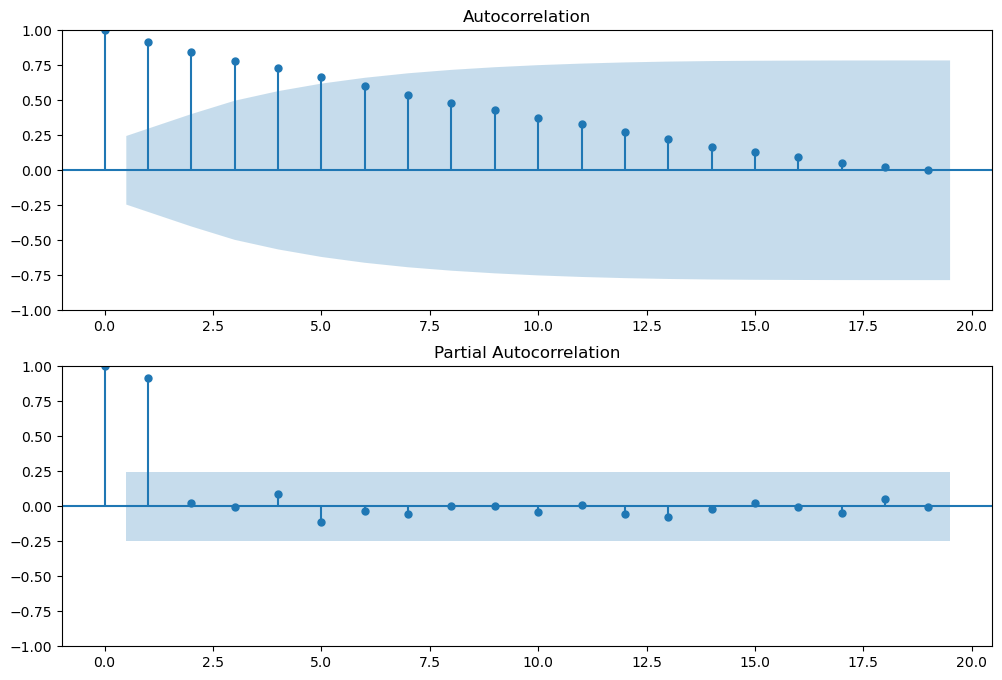

In [27]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['GDP (current USD in billions)'].dropna(),ax=ax1)
plt.savefig('orig_acf.png', transparent=True)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['GDP (current USD in billions)'].dropna(),ax=ax2)
plt.savefig('orig_pacf.png', transparent = True)

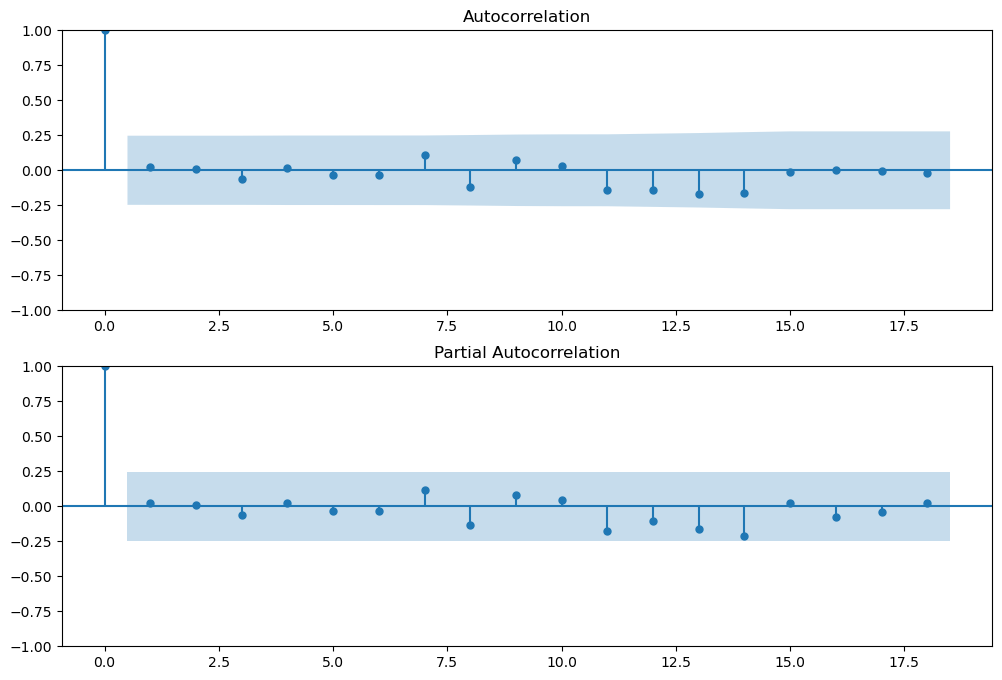

In [28]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
GDP_log_diff = GDP_log.diff().dropna()
fig = sm.graphics.tsa.plot_acf(GDP_log_diff.dropna(),ax=ax1)
plt.savefig('stat_acf.png', transparent=True)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(GDP_log_diff.dropna(),ax=ax2)
plt.savefig('stat_pacf.png', transparent=True)

In [29]:
train=df[:58]
test=df[58:]

In [30]:
model = ARIMA(train['GDP (current USD in billions)'],order=(9,1,11))
model_fit=model.fit()
prediction = model_fit.predict(start=test['GDP (current USD in billions)'].index[0],end=test['GDP (current USD in billions)'].index[-1])
prediction
#print(model_fit.summary())

2018-01-01    2790.026432
2019-01-01    2832.234313
2020-01-01    2935.384304
2021-01-01    3078.403287
2022-01-01    3365.835775
2023-01-01    3614.240446
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [31]:
np.sqrt(mean_squared_error(test['GDP (current USD in billions)'],prediction))

127.60888596018555

In [32]:
test['GDP (current USD in billions)'].mean(),np.sqrt(test['GDP (current USD in billions)'].var())

(3080.0, 422.7528828996912)

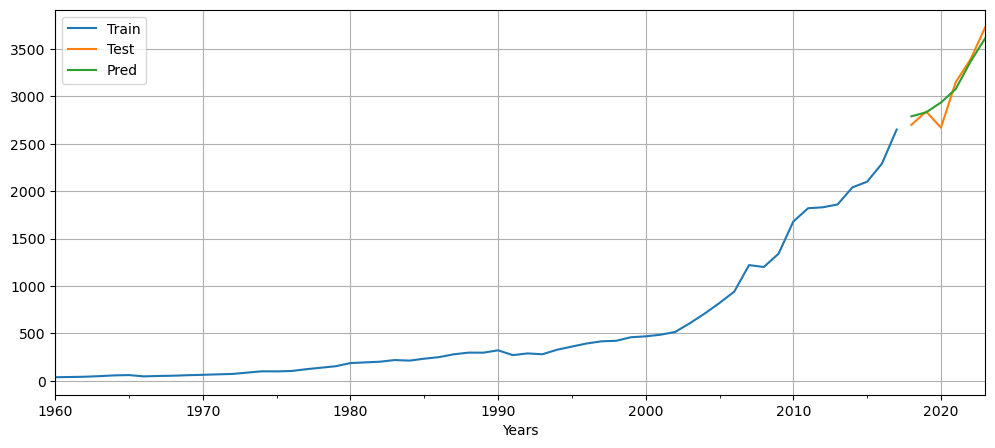

In [33]:
train['GDP (current USD in billions)'].plot(legend=True, label='Train', figsize=(12,5))
test['GDP (current USD in billions)'].plot(legend=True, label='Test')
prediction.plot(legend=True, label='Pred')
plt.grid()
plt.savefig('arimaresult.png',transparent=True)

In [29]:
p=range(0,12)
q=range(0,12)
d=range(0,3)

In [30]:
pdq_combination=list(itertools.product(p,d,q))

In [31]:
len(pdq_combination)

432

In [31]:
rmse=[]
order1=[]

In [32]:
for pdq in pdq_combination:
    try:
        model=ARIMA(train['GDP (current USD in billions)'],order=pdq).fit()
        pred=model.predict(start=test['GDP (current USD in billions)'].index[0],end=test['GDP (current USD in billions)'].index[-1])
        error=np.sqrt(mean_squared_error(test['GDP (current USD in billions)'],pred))
        order1.append(pdq)
        rmse.append(error)
    
    except:
        continue

In [33]:
results=pd.DataFrame(index=order1,data=rmse,columns=['RMSE'])

In [34]:
results.to_csv('results.csv')

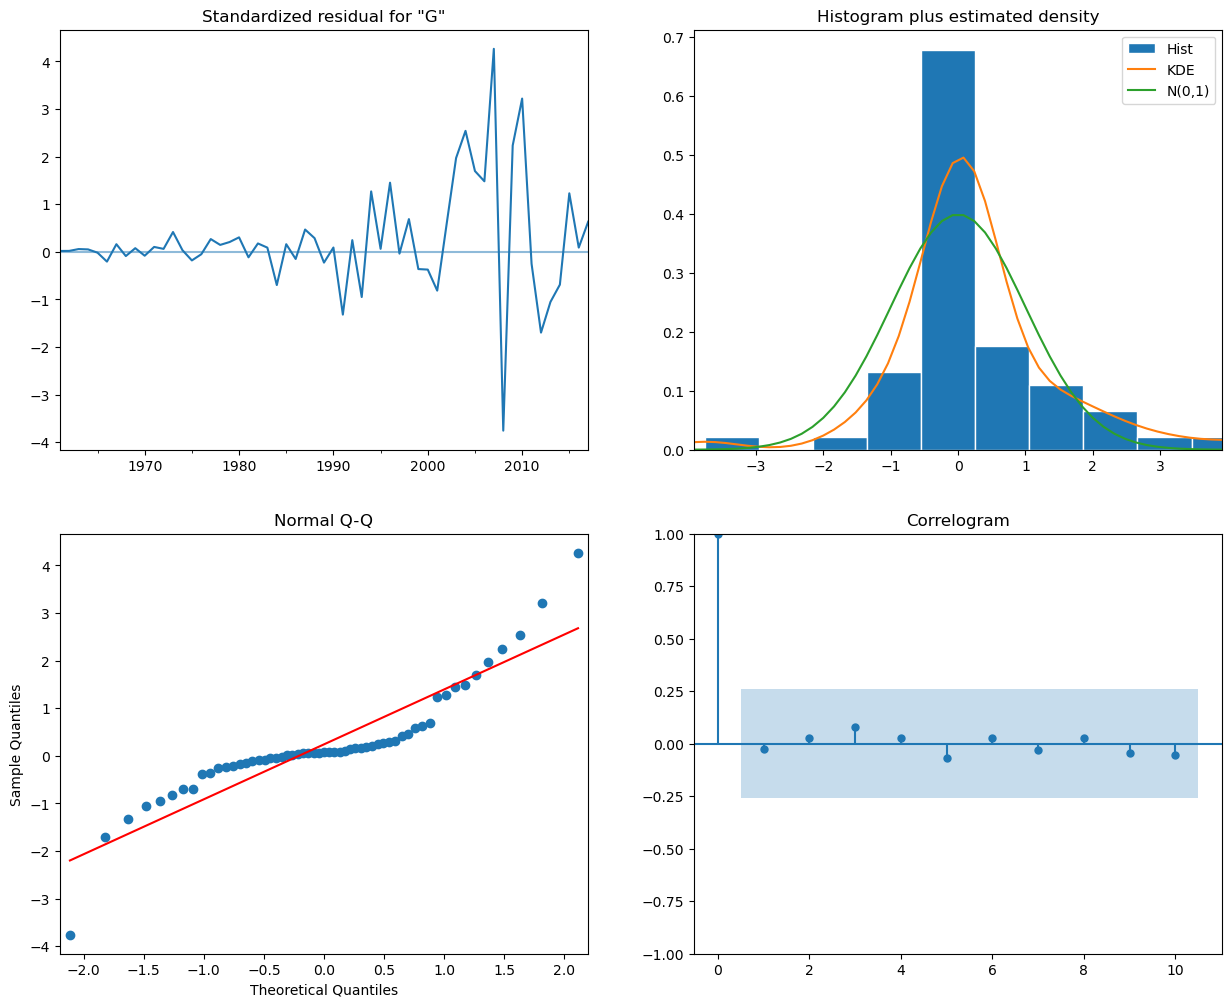

In [34]:
model_fit.plot_diagnostics(figsize=(15,12))
plt.savefig('arima_diagnostics.png', transparent=True)

In [49]:
def forecast(model_fit, periods=16):
    forecast_result = model_fit.get_forecast(steps=periods)
    forecast_data = forecast_result.predicted_mean
    conf_int = forecast_result.conf_int()
    
    forecast_table = pd.DataFrame({
        'Original': df['GDP (current USD in billions)'],
        'Forecast': forecast_data,
        'Lower Limit (95%)': conf_int.iloc[:, 0],
        'Upper Limit (95%)': conf_int.iloc[:, 1]
    }, index=forecast_data.index)
    
    return forecast_table

# Assuming model_fit is your ARIMA model already fitted
forecast_table = forecast(model_fit, periods=16)
print(forecast_table)

            Original     Forecast  Lower Limit (95%)  Upper Limit (95%)
2018-01-01    2700.0  2790.026432        2708.307004        2871.745860
2019-01-01    2840.0  2832.234313        2693.326162        2971.142465
2020-01-01    2670.0  2935.384304        2757.824738        3112.943870
2021-01-01    3150.0  3078.403287        2858.515809        3298.290766
2022-01-01    3390.0  3365.835775        3102.150112        3629.521439
2023-01-01    3730.0  3614.240446        3305.728402        3922.752490
2024-01-01       NaN  3781.196721        3427.485353        4134.908089
2025-01-01       NaN  3822.442116        3393.087224        4251.797007
2026-01-01       NaN  3824.349032        3324.729935        4323.968129
2027-01-01       NaN  3923.149841        3373.020932        4473.278749
2028-01-01       NaN  4094.582571        3495.370809        4693.794332
2029-01-01       NaN  4323.166557        3668.492074        4977.841040
2030-01-01       NaN  4470.554000        3744.903286        5196

In [87]:
residuals = test['GDP (current USD in billions)'] - prediction

In [105]:
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_stat_float = float(lbvalue)
pvalue_float = float(pvalue)
print(f'Ljung-Box test results:')
print(f'LB statistic: {lb_stat_float:.4f}')  # Limit to 4 decimal places
print(f'p-value: {pvalue_float:.4f}')

ValueError: could not convert string to float: 'lb_stat'

<Axes: >

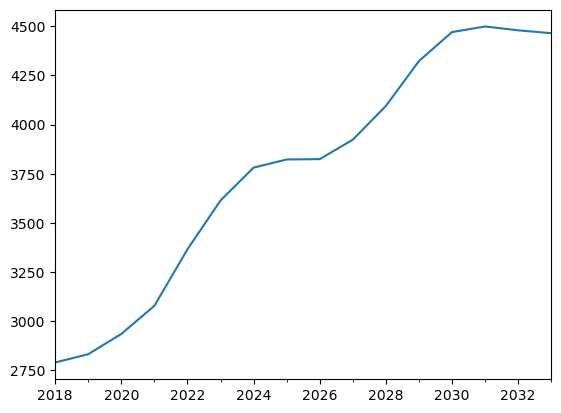

In [52]:
forecast_table['Forecast'].plot()

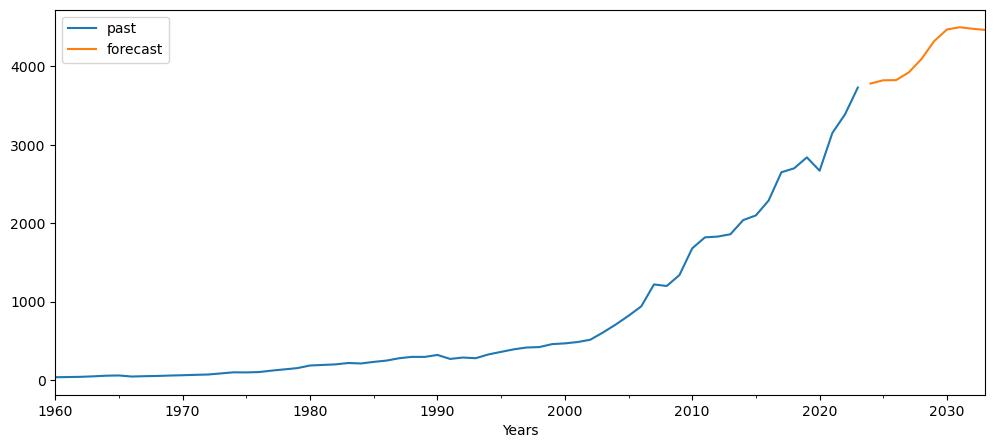

In [56]:
df['GDP (current USD in billions)'].plot(figsize=(12,5), label='past', legend=True)
forecast_table['Forecast'][6:].plot(legend=True, label='forecast')
plt.savefig('forecast.png',transparent=True)